# Исследование компьютерных игр

Цель данного проекта - проанализировать продажи компьютерных игр, чтобы на основании полученных  данных магазин "Стримчик" мог сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Для анализа нам доступны данные о продажах игр до 2016 года. Данные получены из открытых источников.  

Основные этапы предстоящей работы:  
* подготовить данные
* определить актуальный для анализа период
* провести анализ: выявить самые популярные и перспективные игровые платформы, жанры, определить факторы, влияющие на продажи игры, составить портрет пользователя и его предпочтений для разных регионов.

## Изучение данных

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [69]:
#В проекте использован датасет предоставленный Яндекс.Практикум
df = pd.read_csv('/***/***.csv')

**Описание данных:**  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [70]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [72]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [73]:
for col in df:
    print(df[col].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.

### Выводы
* Для двух игр не заполнено название - заполним "Unknown".
* Для двух игр не заполнен жанр - заполним "Unknown".
* Столбец Rating, пропуски - за ассоциацию ESRB мы рейтинги не заполним, поэтомц поставим  "Unknown".
* Пропуски в столбце Year_of_Release заполнить реалистичными значениями невозможно - заполним условными, например "1800"
* Тип данных в колонке Year_of_Release можно заменить на int
* Тип данных Critic_Score можно поменять на int, пропуски заполним условным значением "-1"
* Тип User_Score поменяем на числовой, пропуски заполним условным значением "-1"

## Подготовка данных

Заменим названия столбцов

In [74]:
df.columns = df.columns.str.lower()

In [75]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных и замена пропусков

Начнем с года. Заменим пропуски на 1800

In [76]:
df['year_of_release']=df['year_of_release'].fillna(1800)

In [77]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1800., 1995., 1991., 1981., 1987.,
       1980., 1983.])

Тип данных поменяем на целочисленный

In [78]:
df['year_of_release']=df['year_of_release'].astype('int')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [80]:
df.query('year_of_release == 1800').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,1800,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,1800,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,1800,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,1800,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,1800,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В user_score пропуски заменим на -1. Значения 'tbd' вероятно означают 'to be determined' - возможно такие значения еще будут заполнены, поэтому заменим на -2, чтобы можно было отличить от замены пропусков.

In [81]:
df['user_score']=df['user_score'].replace('tbd', np.nan)

In [82]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [83]:
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

В rating пропуски заменим на 'unknown'

In [84]:
df['rating']=df['rating'].fillna('unknown')

Проверим строки в которых не заполнено имя

In [85]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Для этих же строк не заполнен жанр. Удалим 2 строки, потеря двух строк ни на что не повлияет.

In [86]:
df = df.dropna(subset = ['name'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Рассчитываем суммарные продажи

In [88]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [89]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Выводы 
* Названия столбцов привели к нижнему регистру
* Привели тип данных к числовому в столбцах year_of_release, user_score.
* Заполнили пропуски условными значениями в rating.

Предположительные причины пропусков:
* year_of_release: закономерностей не видно, разные платформы и годы (судя по названиям игр). Возможно, ошибки при вводе данных
* critic_score, user_score, rating: такие данные могут быть не за все годы, также их может не быть в отдельных источниках данных, ассоциация ESRB может выставлять рейтинг не всем играм (может быть для других игр рейтинг выставила другая ассоциация?)

Общие продажи:
* Рассчитали и добавили в таблицу столбец с общими продажами по всем регионам.

## Исследовательский анализ данных

### Изучаем сколько игр выпускалось в разные годы. 

In [90]:
df.query('year_of_release > 1800').groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

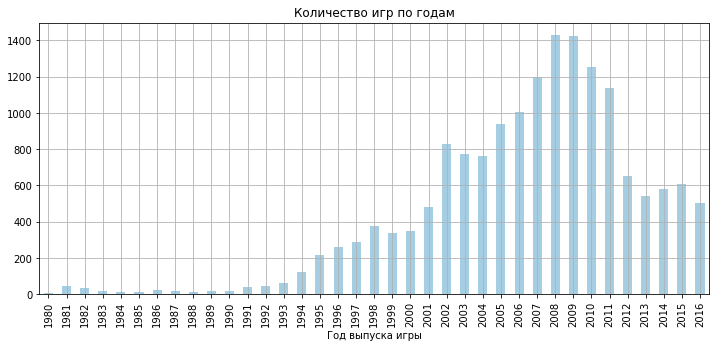

In [91]:
df.query('year_of_release > 1800').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(
    kind = 'bar', grid = True, rot = 90, figsize = (12,5), legend = False, 
    title = 'Количество игр по годам')
plt.xlabel("Год выпуска игры")
plt.show()

In [92]:
df_year = df.query('year_of_release > 1800').pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

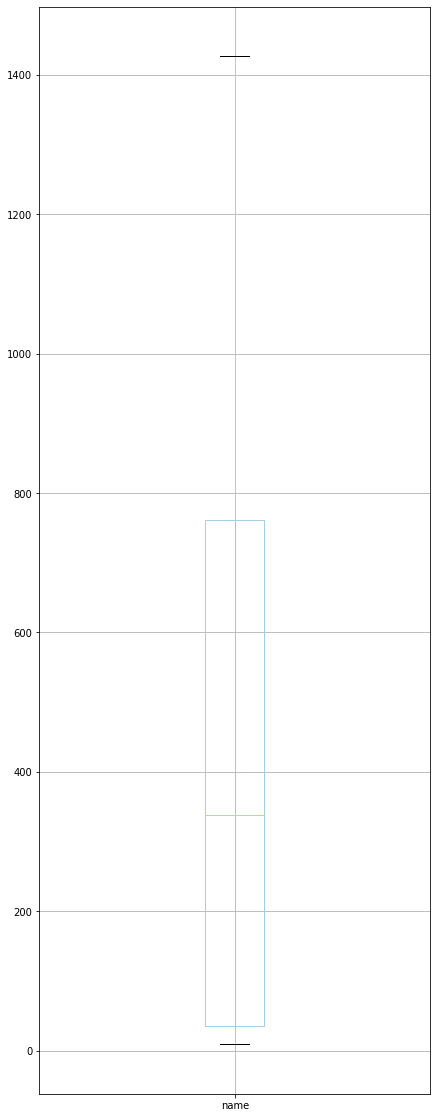

In [93]:
df_year.boxplot(column='name', figsize = (7,20))
plt.show()

In [94]:
df_year.describe()

,name
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


Судя по диаграмме размаха, выбросов нет. Но в целом можно сказать, что активный рост количества выпускаемых игр начался в 1994-м. Вероятно, период до 1994го не так важен. 
Также можно отметить что период с наибольшим количеством выпускаемых игра пришелся на 2005-2011 годы.

### Изучаем как менялись продажи по платформам

Посмотрим на суммарные продажи по платформам

In [95]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Посмотрим как рапределены продажи игр по годам для платформ с наибольшими суммарными продажами (более 300 миллионов проданных копий)

In [96]:
df_1 = df.query('year_of_release > 1994 and platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA"]')

In [97]:
year_sales = df_1.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending = False).reset_index()

In [98]:
year_sales.head(10)

,platform,year_of_release,total_sales
0,PS2,2004,211.81
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,184.31
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS,1998,169.49
7,PS2,2001,166.43
8,PS2,2005,160.66
9,PS3,2011,156.78


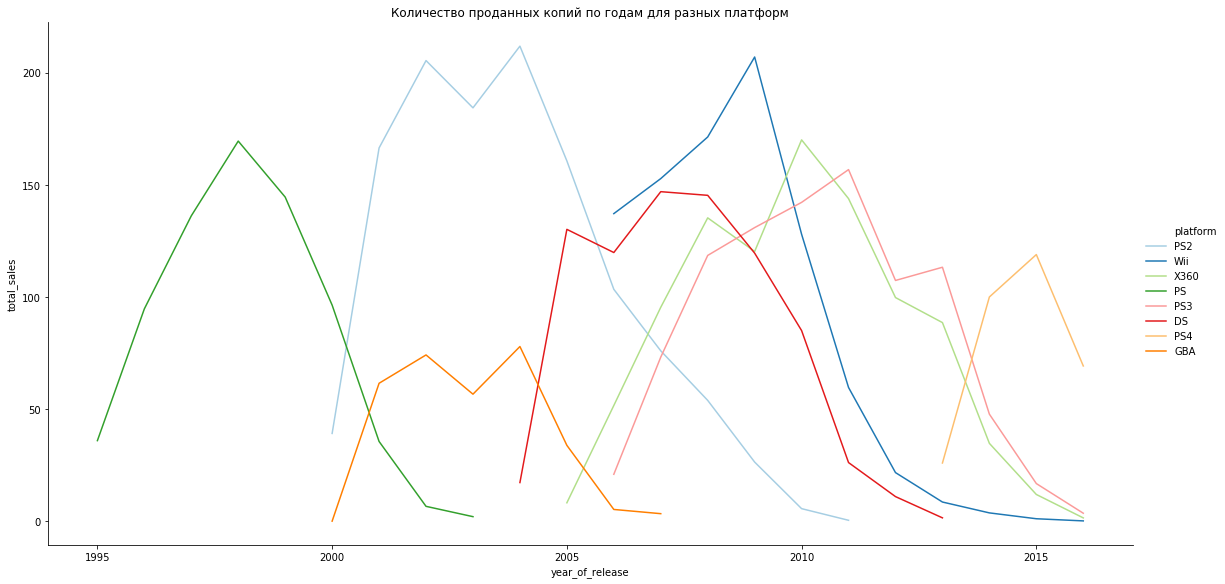

In [99]:
sns.relplot(data=year_sales, x="year_of_release", y="total_sales", hue="platform", kind="line",
           height=8, aspect=2).set(title='Количество проданных копий по годам для разных платформ');

Популярные платформы присутствуют на ранке около 10 лет.

Посмотрим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ. Для этого посмотрим на ситуацию за последние 5 лет - на этом отрезке увидим закат старых платформ и восхождение новых.  
При этом платформы, которые уже давно ушли с ранка, не будут попадать в выборку, и соответственно не будут искажать актуальную на данный момент картину.

In [100]:
df_5 = df.query('year_of_release >= 2012').copy()

In [101]:
df_5.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [102]:
year_sales_5 = df_5.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

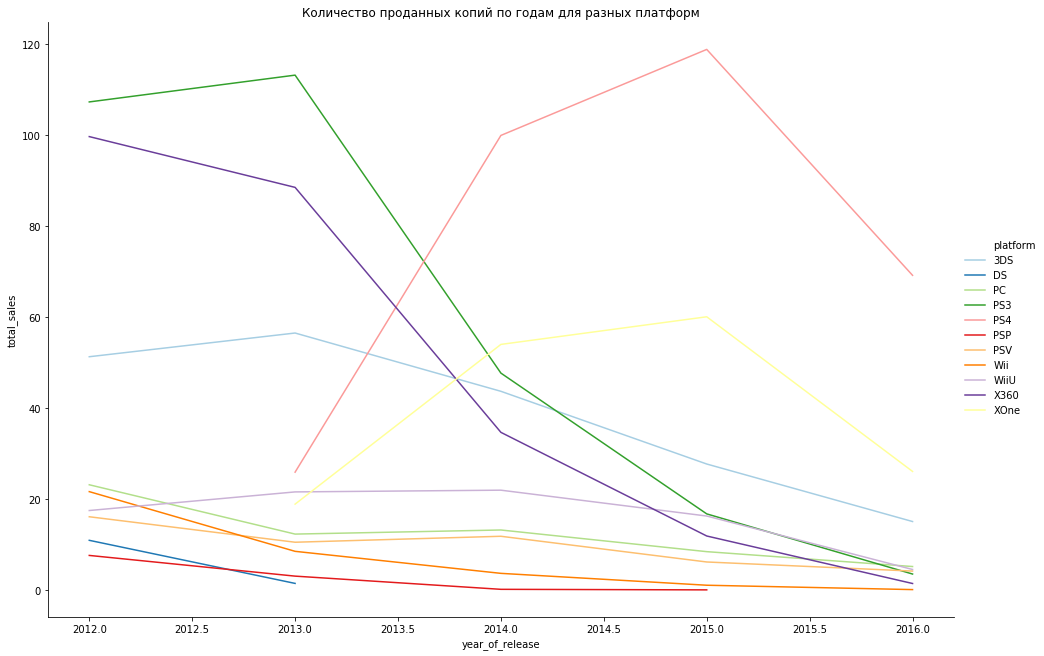

In [103]:
sns.set_palette('Paired') 
sns.relplot(data=year_sales_5, x="year_of_release", y="total_sales", hue="platform", kind="line", 
           height=9, aspect=1.5, palette='Paired').set(title='Количество проданных копий по годам для разных платформ')
plt.show()

* Платформы PS4 и XOne одновременно являются лидерами по объему продаж и демонстрируют рост (вероятно за 2016й год данные неполные, поэтому все платформы в 2016м демонстрируют падение). Запустились обе платформы в 2013 году (3 года назад), поэтому можно предположить, что в ближайшие пару лет они еще будут расти. 
* Уровень продаж для PC не очень большой, и плавно снижается в последние годы.
* Продажи для 3DS и WiiU снижаются.
* PS3 и X360 определенно подходят к концу своего жизненного цикла, продажи на них неуклонно падают уже несколько лет.

### Изучаем глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [104]:
df_5_year_sales = df_5.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index().copy()

In [105]:
df_5_year_sales

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,PS3,2013,113.25
2,PS3,2012,107.36
3,PS4,2014,100.00
4,X360,2012,99.74
5,X360,2013,88.58
6,PS4,2016,69.25
7,XOne,2015,60.14
8,3DS,2013,56.57
9,XOne,2014,54.07


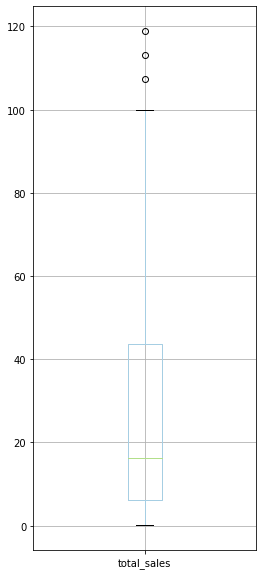

In [106]:
df_5_year_sales.boxplot(column='total_sales', figsize = (4,10))

plt.show()

In [107]:
df_5_year_sales['total_sales'].describe()

count     49.00000
mean      29.52102
std       33.28041
min        0.12000
25%        6.25000
50%       16.35000
75%       43.76000
max      118.90000
Name: total_sales, dtype: float64

С помощью диаграммы размаха изучим общие продажи в разбивке по платформам.

In [108]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

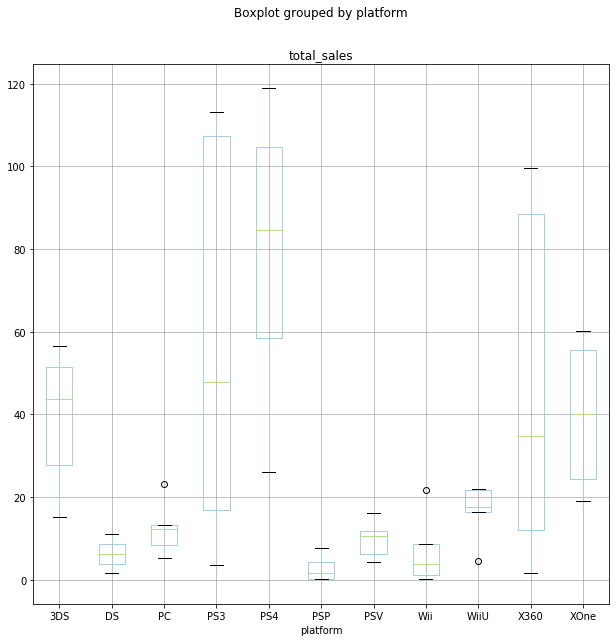

In [109]:
df_5_year_sales.boxplot(column='total_sales', by='platform', figsize = (10,10))

plt.show()

В разбивке по платформам хорошо видно как на рынке доминируют платформы семейств Playstation и X-Box разных поколений. Конкуренцию им за последние 5 лет могла составить разве что Nintendo 3DS.

Можно сказать, что некоторые платформы намного популярнее других: медианное значение около 16 млн проданных копий за год, в то время как среднее почти в два раза больше - почти 30 млн. 
В 2012, 2013 и 2015 году платформа PS3/4 настолько опередила всех по продажам, что такой показатель можно считать выбросом - маловероятно, что кому-то удастся повторить этот успех.
В целом за последние 5 лет на рынке доминируют платформы семейств Playstation и X-box.

### Изучаем влияние отзывы пользователей и критиков на продажи

В качестве платформы для изучения возьмем XOne

In [110]:
df_5_xone = df_5.query('platform == "XOne"').reset_index().copy()

In [111]:
df_5_xone.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1,165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
4,270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
5,342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,unknown,3.66
6,373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
7,398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75.0,5.5,T,3.37
8,413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
9,417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


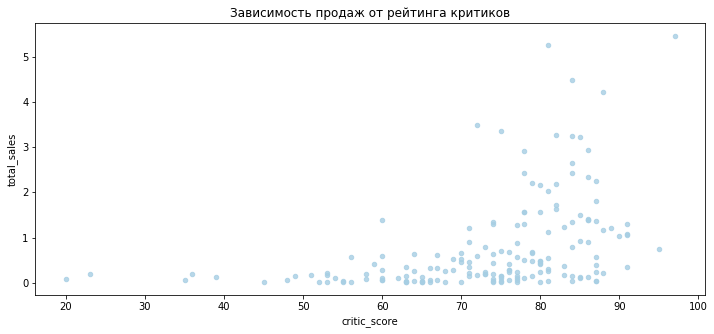

In [112]:
df_5_xone.query('critic_score>= 0').plot(
    x='critic_score', y='total_sales', kind='scatter', figsize = (12,5), alpha=0.8, 
    title = 'Зависимость продаж от рейтинга критиков');


Судя по диаграмме продажи несколько улучшаются если рейтинг критиков больше 70.

In [113]:
df_5_xone.query('critic_score>= 0')['critic_score'].corr(df_5_xone.query('critic_score>= 0')['total_sales'])

0.4169983280084017

Наблюдается средняя положительная корреляция

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


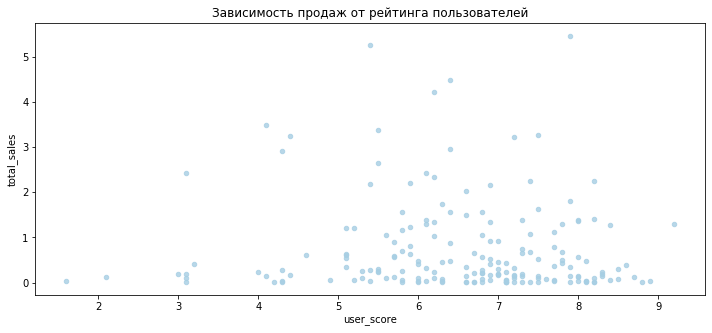

In [114]:
df_5_xone.query('user_score>= 0').plot(
    x='user_score', y='total_sales', kind='scatter', figsize = (12,5), alpha=0.8, 
    title = 'Зависимость продаж от рейтинга пользователей');

Рейтинги пользователей в основном расположились от 4 до 9. Особого влияния на продажи рейтинги не оказывают.

In [115]:
df_5_xone.query('user_score>= 0')['user_score'].corr(df_5_xone.query('user_score>= 0')['total_sales'])

-0.06892505328279414

Можно сказать, что корреляции между отзывами пользователей и продажами нет.

Посмотрим как отзывы влияли на продажи для PS4 

In [116]:
df_5_ps4 = df_5.query('platform == "PS4"').reset_index().copy()

Отзывы критиков:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


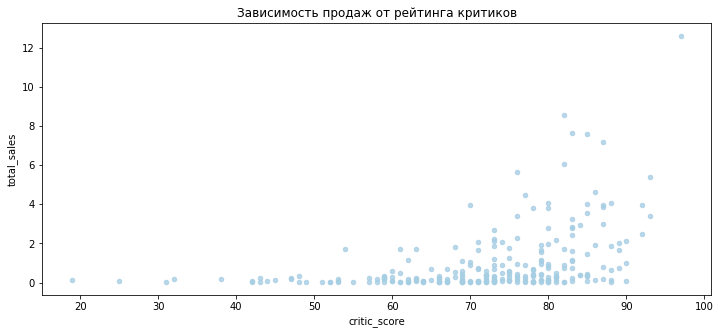

In [117]:
df_5_ps4.query('critic_score>= 0').plot(
    x='critic_score', y='total_sales', kind='scatter', figsize = (12,5), alpha=0.8, 
    title = 'Зависимость продаж от рейтинга критиков');


In [118]:
df_5_ps4.query('critic_score>= 0')['critic_score'].corr(df_5_ps4.query('critic_score>= 0')['total_sales'])

0.40656790206178095

Отзывы пользователей:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


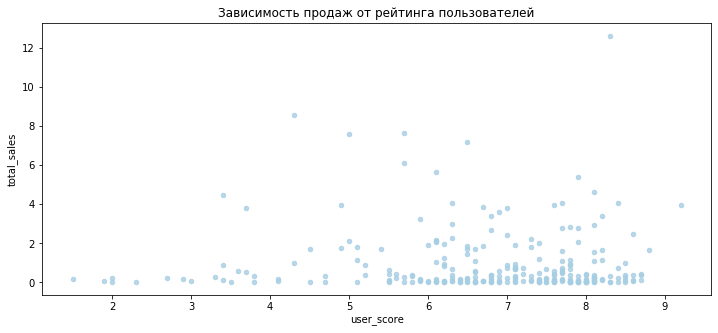

In [119]:
df_5_ps4.query('user_score>= 0').plot(
    x='user_score', y='total_sales', kind='scatter', figsize = (12,5), alpha=0.8, 
    title = 'Зависимость продаж от рейтинга пользователей');

In [120]:
df_5_ps4.query('user_score>= 0')['user_score'].corr(df_5_ps4.query('user_score>= 0')['total_sales'])

-0.031957110204556424

Ситуация практически идентичная.

### Изучаем распределение игр по жанрам

Посмотрим игры каких жанров выпускались за последние 10 лет

In [121]:
df_5_grouped = df_5.groupby('genre')['total_sales'].agg(['sum', 'mean']).reset_index().sort_values(by = 'sum', ascending = False)

In [122]:
df_5_grouped

,genre,sum,mean
0,Action,441.12,0.427856
8,Shooter,304.73,1.296723
7,Role-Playing,192.80,0.521081
10,Sports,181.07,0.675634
3,Misc,85.04,0.442917
4,Platform,61.00,0.717647
6,Racing,53.50,0.465217
2,Fighting,44.49,0.408165
9,Simulation,35.12,0.439000
1,Adventure,29.43,0.097450


<Figure size 432x288 with 0 Axes>

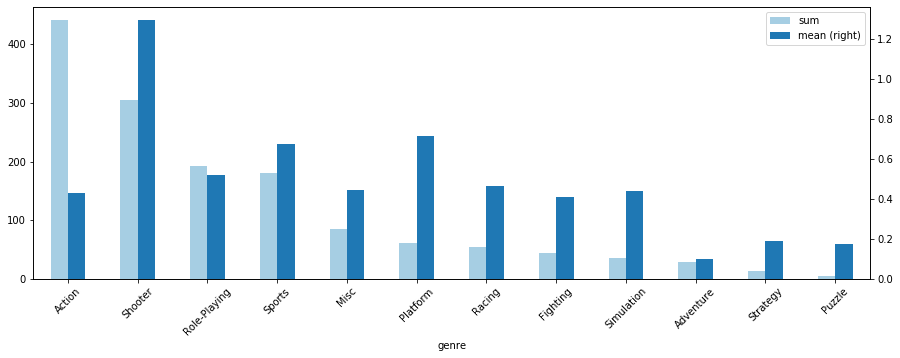

In [123]:
fig = plt.figure()
ax1 = df_5_grouped.plot(x = 'genre', secondary_y = 'mean', kind = 'bar', figsize = (15,5), rot = 45)
ax1.set_xticks(np.arange(len(df_5_grouped['genre'])))
ax1.set_xticklabels(df_5_grouped['genre'].values)
plt.show()

По количеству проданных копий лидируют Action (абсолютный лидер), Shooter, Sports. Меньше всего продано игр в жанрах Strategy, Puzzle.  
Судя по средним продажам, лучше всего продаются шутеры, также хорошие результаты у платформеров и спортивных симуляторов.

### Выводы
* При приобретении игры пользователи больше внимания обращают на отзывы критиков, чем на отзывы других пользователей.
* По количеству проданных копий лидируют Action (абсолютный лидер), Shooter, Sports. Меньше всего продано игр в жанрах Strategy, Puzzle.

## Составляем портрет пользователя каждого региона

### Определим самые популярные платформы (топ-5) в каждом регионе (NA, EU, JP).

In [124]:
platforms_na = df_5.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

In [125]:
platforms_na

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


In [126]:
platforms_na=platforms_na.set_index('platform')

In [127]:
platforms_eu = df_5.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

In [128]:
platforms_eu

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


In [129]:
platforms_eu=platforms_eu.set_index('platform')

In [130]:
platforms_jp = df_5.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

In [131]:
platforms_jp

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


In [132]:
platforms_jp=platforms_jp.set_index('platform')

In [133]:
platforms_jp

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


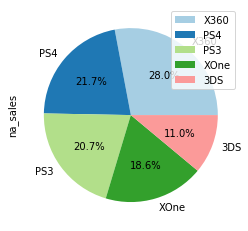

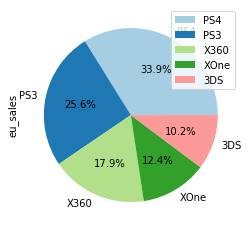

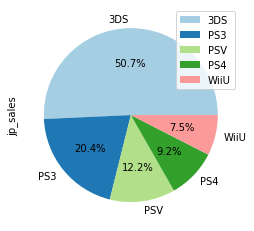

In [134]:
platforms_na[0:5].plot(kind='pie', y='na_sales',autopct='%1.1f%%')
platforms_eu[0:5].plot(kind='pie', y='eu_sales',autopct='%1.1f%%')
platforms_jp[0:5].plot(kind='pie', y='jp_sales',autopct='%1.1f%%')

plt.show()

#### Выводы
В Северной Америке самыми популярными платформами являются:   
X360 140.05  
PS4	108.74  
PS3	103.38  
XOne 93.12  
3DS	55.31  
 
В Европе:  
PS4	141.09  
PS3	106.86  
X360 74.52  
XOne 51.59  
3DS	42.64  

В Японии:  
3DS	87.79  
PS3	35.29  
PSV	21.04  
PS4	15.96  
WiiU 13.01  

X360, на который приходится почти треть продаж в Северной Америке и пятая часть в Европе, в Японии вовсе не вошел в топ-5. Также в Северной Америке и Европе на лидирующих позициях PS4, а в Японии половина продаж пришлась на 3DS.
В свою очередь в Северной Америке и Европе у 3DS только 10 процетов продаж.
В целом можно сделать вывод, что предпочтения игроков в Северной Америке и Европе схожи, а вот в Японии отличаются. 

### Определим самые популярные жанрыпо регионам.

In [135]:
genres_na = df_5.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

In [136]:
genres_na[0:5]

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [137]:
genres_eu = df_5.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

In [138]:
genres_eu[0:5]

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [139]:
genres_jp = df_5.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

In [140]:
genres_jp[0:5]

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


####  Выводы
Топ-5 жанров практически совпадает в Северной Америке и Европе. На первы 4-х позициях Action, Shooter, Sports, Role-Playing. На 5й позиции в СА Misc, а в Европе - Racing. 
А вот в Японии на первом месте с большим отрывом Role-Playing, в то время как Action на втором. Misc также как и в других регионах входит в топ-5. Также в пятерке Simulation и Fighting.

### Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [141]:
df_5.loc[:,('rating','na_sales','eu_sales','jp_sales' )].groupby('rating').agg(['mean','sum'])

na_sales          eu_sales          jp_sales        
             mean     sum      mean     sum      mean     sum
rating                                                       
E        0.289544  114.37  0.286152  113.03  0.071722   28.33
E10+     0.247386   75.70  0.180948   55.37  0.026765    8.19
M        0.465000  231.57  0.389478  193.96  0.042570   21.20
T        0.160243   66.02  0.128544   52.96  0.063155   26.02
unknown  0.081027  103.31  0.071765   91.50  0.085365  108.84

#### Выводы
Во всех регионах продажи игр различаются в зависимости от рейтинга ESRB. В Северной Америке и Европе по абсолютным показателям продаж лидируют игры с рейтингом M.
Для Северной Америки и Европы за рейтингом M следуют Е, E10+ и T. В Японии распределение несколько иное: E, T, M, E10+.
В Северной Америке и Европе заметно выделяются средние продажи игр с рейтингом M - они значительно выше средних продаж игр с иными рейтингами. В Японии такого явного лидера нет.  
Также в Японии суммарные продажи игр без рейтинга превышают продажи игр с рейтингом. В Японии рейтинги чаще вытавляет другое агентство, поэтому для принятия более квалифицированного решения о влиянии рейтинга на продажи в Японии лучше провести дополнительное исследование.

## Проверка гипотез

Проверим гипотезу:  
Нулевая гипотеза H0 "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"  
Альтернативная гипотеза H1 "Средние пользовательские рейтинги платформ Xbox One и PC различаются"

Посмотрим на средние значения выборки

In [142]:
df_5[(df_5['user_score']>=0) & (df_5['platform']=='XOne')]['user_score'].mean()

6.521428571428572

In [143]:
df_5[(df_5['user_score']>=0) & (df_5['platform']=='PC')]['user_score'].mean()

6.4286407766990274

In [144]:
xone_rating = df_5[(df_5['user_score']>=0) & (df_5['platform']=='XOne')]['user_score']
xone_rating.head(10)

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
398    5.5
413    7.5
417    4.4
422    7.2
484    6.4
Name: user_score, dtype: float64

In [145]:
PC_rating = df_5[(df_5['user_score']>=0) & (df_5['platform']=='PC')]['user_score']
PC_rating.head(10)

192     4.0
458     3.9
688     7.9
959     4.8
1095    7.9
1227    4.2
1351    2.2
1437    6.0
1530    5.4
1730    7.9
Name: user_score, dtype: float64

In [146]:
alpha = 0.05

results = st.ttest_ind(xone_rating, PC_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Средние значения пользовательских рейтингов платформ XOne и PC для нашей выборки различаются не очень сильно (примерно на 0,1 пункта). По результатам Т-теста гипотеза о равенстве рейтингов не отвергнута - различие в выборке может быть случайностью, и средние рейтинги могут быть равны в генеральной совокупности.

Проверим следующую гипотезу
H0 "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
H1 "Средние пользовательские рейтинги жанров Action и Sports разные."

Посмотрим на средние по выборке

In [147]:
df_5[(df_5['user_score']>=0) & (df_5['genre']=='Action')]['user_score'].mean()

6.825047801147227

In [148]:
df_5[(df_5['user_score']>=0) & (df_5['genre']=='Sports')]['user_score'].mean()

5.455897435897437

Проведем Т-тест

In [149]:
action_rating = df_5[(df_5['user_score']>=0) & (df_5['genre']=='Action')]['user_score']
action_rating.head(10)

16     8.2
23     8.1
42     8.3
81     6.6
127    6.9
149    9.1
165    7.9
176    6.7
190    6.1
231    8.1
Name: user_score, dtype: float64

In [150]:
sports_rating = df_5[(df_5['user_score']>=0) & (df_5['genre']=='Sports')]['user_score']
sports_rating.head(10)

77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
271    4.2
314    6.7
417    4.4
420    5.9
469    6.3
Name: user_score, dtype: float64

In [152]:
alpha = 0.05

results = st.ttest_ind(action_rating, sports_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Для нашей выборки средние значения пользовательских рейтингов для жанров Action и Sports отличаются примерно на 1,4 балла. По результатам Т-теста гипотезу о равенстве средних рейтингов мы отвергли. Вероятно, такое различие не случайно, и характерно также для генеральной совокупности. 

## Выводы
Результаты предобработки данных:
* Названия столбцов привели к нижнему регистру
* Привели тип данных к числовому в столбцах year_of_release, critic_score, user_score.
* Заполнили пропуски условными значениями в year_of_release, critic_score, user_score, rating.

Предположительные причины пропусков:
* year_of_release: закономерностей не видно, разные платформы и годы (судя по названиям игр). Возможно, ошибки при вводе данных
* critic_score, user_score, rating: такие данные могут быть не за все годы, также их может не быть в отдельных источниках данных, ассоциация ESRB может выставлять рейтинг не всем играм (может быть для других игр рейтинг выставила другая ассоциация?)

* Рассчитали и добавили в таблицу столбец с общими продажами по всем регионам.


Количество выпускаемых игр:
* Судя по диаграмме размаха для количества выпускаемых игр, выбросов нет. Но в целом можно сказать, что активный рост количества выпускаемых игр начался в 1994-м. Вероятно, период до 1994го не так важен. 
Также можно отметить что период с наибольшим количеством выпускаемых игр пришелся на 2005-2011 годы.


Продажи:
* В последние годы платформы PS4 и XOne одновременно являются лидерами по объему продаж и демонстрируют рост (вероятно за 2016й год данные неполные, поэтому все платформы в 2016м демонстрируют падение). Запустились обе платформы в 2013 году (3 года назад), поэтому можно предположить, что в ближайшие пару лет они еще будут расти. 
* Уровень продаж для PC не очень большой, и плавно снижается в последние годы.
* Продажи для 3DS и WiiU снижаются.
* PS3 и X360 определенно подходят к концу своего жизненного цикла, продажи на них неуклонно падают уже несколько лет.


* Можно сказать, что некоторые платформы намного популярнее других: медианное значение около 35 млн проданных копий за год, в то время как среднее почти в два раза больше - почти 50 млн. 
* В целом за последние 5 лет на рынке доминируют платформы семейств Playstation и X-box.


Влияние отзывов на продажи:
* Изучив данные по платформе XOne мы пришли к выводу что отзывы критиков имеют значительно большее влияние на уровень продаж, чем отзывы пользователей. Это же подтвердилось для PS4.


Популярные жанры:
* По количеству проданных копий лидируют жанры Action (абсолютный лидер), Shooter, Sports. Меньше всего продано игр в жанрах Strategy, Puzzle.


Различия в популярности платформ по регионам:
* X360, на который приходится почти треть продаж в Северной Америке и пятая часть в Европе, в Японии вовсе не вошел в топ-5. Также в Северной Америке и Европе на лидирующих позициях PS4, а в Японии половина продаж пришлась на 3DS.
В свою очередь в Северной Америке и Европе у 3DS только 10 процетов продаж.
В целом можно сделать вывод, что предпочтения игроков в Северной Америке и Европе схожи, а вот в Японии отличаются.

* Топ-5 жанров практически совпадает в Северной Америке и Европе. На первы 4-х позициях Action, Shooter, Sports, Role-Playing. На 5й позиции в СА Misc, а в Европе - Racing. А вот в Японии на первом месте с большим отрывом Role-Playing, в то время как Action на втором. Misc также как и в других регионах входит в топ-5. Также в пятерке Simulation и Fighting.


* Во всех регионах продажи игр различаются в зависимости от рейтинга ESRB. Во всех регионах продажи игр различаются в зависимости от рейтинга ESRB. В Северной Америке и Европе по абсолютным показателям продаж лидируют игры с рейтингом M.
Для Северной Америки и Европы за рейтингом M следуют Е, E10+ и T. В Японии распределение несколько иное: E, T, M, E10+.
В Северной Америке и Европе заметно выделяются средние продажи игр с рейтингом M - они значительно выше средних продаж игр с иными рейтингами. В Японии такого явного лидера нет.  
Также в Японии суммарные продажи игр без рейтинга превышают продажи игр с рейтингом. В Японии рейтинги чаще вытавляет другое агентство, поэтому для принятия более квалифицированного решения о влиянии рейтинга на продажи в Японии лучше провести дополнительное исследование.


Проверки гипотез:
* Средние значения пользовательских рейтингов платформ XOne и PC для нашей выборки различаются не очень сильно (примерно на 0,1 пункта). По результатам Т-теста гипотеза о равенстве рейтингов не отвергнута - различие в выборке может быть случайностью, и средние рейтинги могут быть равны в генеральной совокупности.

* Для нашей выборки средние значения пользовательских рейтингов для жанров Action и Sports отличаются примерно на 1,4 балла. По результатам Т-теста гипотезу о равенстве средних рейтингов мы отвергли. Вероятно, такое различие не случайно, и характерно также для генеральной совокупности. 